In [1]:
import requests
from google.colab import files

url = 'https://drive.usercontent.google.com/download?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV&export=download&confirm=t&uuid=0bbb9778-f9c3-4df6-9f40-b7d18775eb74'
response = requests.get(url, allow_redirects=True)
open('Fraud.csv', 'wb').write(response.content)

493534783

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Data Description

* step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* amount - amount of the transaction in local currency.

* nameOrig - customer who started the transaction

* oldbalanceOrg - initial balance before the transaction

* newbalanceOrig - new balance after the transaction

* nameDest - customer who is the recipient of the transaction

* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [3]:
fraud = pd.read_csv('Fraud.csv')

In [4]:
data = fraud.copy()

In [5]:
fraud.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
fraud.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
fraud.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [8]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
fraud.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1530544995,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [10]:
merchant_transactions = fraud[fraud['nameDest'].str.startswith('M')]

In [11]:
merchant_transactions[['nameDest','oldbalanceDest','newbalanceDest']].head()

,nameDest,oldbalanceDest,newbalanceDest
0,M1979787155,0.0,0.0
1,M2044282225,0.0,0.0
4,M1230701703,0.0,0.0
5,M573487274,0.0,0.0
6,M408069119,0.0,0.0


Here in the payment, where the destination is merchant, the zero are intentionally imputed, considering it as a behaviour... So no imputation needed

In [12]:
#checking the potential errors in the dataset related to the balance
non_fraud = fraud[(fraud['isFraud']==0)&(fraud['nameDest'].str.startswith('C'))].copy()
non_fraud['expected_balance_orig'] = abs(non_fraud['oldbalanceOrg'] - non_fraud['amount'])
non_fraud['difference_in_balance_orig'] = abs(non_fraud['expected_balance_orig'] - non_fraud['newbalanceOrig'])

print("\nRows with difference_in_balance_orig when fraud=0:")
non_fraud[non_fraud['difference_in_balance_orig'] > 0.1][['oldbalanceOrg', 'amount', 'newbalanceOrig', 'expected_balance_orig','difference_in_balance_orig','isFraud','isFlaggedFraud']]


Rows with difference_in_balance_orig when fraud=0:


,oldbalanceOrg,amount,newbalanceOrig,expected_balance_orig,difference_in_balance_orig,isFraud,isFlaggedFraud
10,4465.00,9644.94,0.00,5179.94,5179.94,0,0
15,15325.00,229133.94,0.00,213808.94,213808.94,0,0
19,705.00,215310.30,0.00,214605.30,214605.30,0,0
24,10835.00,311685.89,0.00,300850.89,300850.89,0,0
42,26845.41,110414.71,0.00,83569.30,83569.30,0,0
...,...,...,...,...,...,...,...
6362315,101281.00,96239.74,197520.74,5041.26,192479.48,0,0
6362317,170.00,317177.48,0.00,317007.48,317007.48,0,0
6362320,3859.00,159188.22,0.00,155329.22,155329.22,0,0
6362321,168046.00,186273.84,0.00,18227.84,18227.84,0,0


In the above output we can see that the amount is bigger than the oldbalanceOrg, due to which the newbalanceOrig is zero and not equals to expectedbalance

In [13]:
fraud_1 = fraud[(fraud['isFraud']==1)&(fraud['nameDest'].str.startswith('C'))].copy()
fraud_1['expected_balance_orig'] = abs(fraud_1['oldbalanceOrg'] - fraud_1['amount'])
fraud_1['difference_in_balance_orig'] = abs(fraud_1['expected_balance_orig'] - fraud_1['newbalanceOrig'])

print("\nRows with difference_in_balance_orig when fraud=1 :")
fraud_1[fraud_1['difference_in_balance_orig'] > 0.1][['oldbalanceOrg', 'amount', 'newbalanceOrig', 'expected_balance_orig','difference_in_balance_orig','isFraud','isFlaggedFraud']]



Rows with difference_in_balance_orig when fraud=1 :


,oldbalanceOrg,amount,newbalanceOrig,expected_balance_orig,difference_in_balance_orig,isFraud,isFlaggedFraud
724,0.00,416001.33,0.00,416001.33,416001.33,1,0
1911,4499.08,132842.64,0.00,128343.56,128343.56,1,0
14861,0.00,181728.11,0.00,181728.11,181728.11,1,0
25875,0.00,1078013.76,0.00,1078013.76,1078013.76,1,0
77745,0.00,277970.88,0.00,277970.88,277970.88,1,0
138559,0.00,1933920.80,0.00,1933920.80,1933920.80,1,0
169998,0.00,149668.66,0.00,149668.66,149668.66,1,0
178668,0.00,222048.71,0.00,222048.71,222048.71,1,0
200845,0.00,454859.39,0.00,454859.39,454859.39,1,0
217978,79466.45,123194.95,0.00,43728.50,43728.50,1,0


In [14]:
fraud_dest_0 = fraud[(fraud['isFraud']==0)&(fraud['nameDest'].str.startswith('C'))].copy()
fraud_dest_0['expected_balance_Dest'] = abs(fraud_dest_0['oldbalanceDest'] + fraud_dest_0['amount'])
fraud_dest_0['difference_in_balance_Dest'] = abs(fraud_dest_0['expected_balance_Dest'] - fraud_dest_0['newbalanceDest'])

print("\nRows with difference_in_balance_Dest when fraud=0 :")
fraud_dest_0[fraud_dest_0['difference_in_balance_Dest'] > 0.1][['oldbalanceDest', 'amount', 'newbalanceDest', 'expected_balance_Dest', 'difference_in_balance_Dest','isFraud','isFlaggedFraud' ]]



Rows with difference_in_balance_Dest when fraud=0 :


,oldbalanceDest,amount,newbalanceDest,expected_balance_Dest,difference_in_balance_Dest,isFraud,isFlaggedFraud
9,41898.00,5337.77,40348.79,47235.77,6886.98,0,0
10,10845.00,9644.94,157982.12,20489.94,137492.18,0,0
15,5083.00,229133.94,51513.44,234216.94,182703.50,0,0
19,22425.00,215310.30,0.00,237735.30,237735.30,0,0
21,29832.00,9302.79,16896.70,39134.79,22238.09,0,0
...,...,...,...,...,...,...,...
6362253,0.00,188888.89,0.00,188888.89,188888.89,0,0
6362271,512791.59,27919.60,484871.98,540711.19,55839.21,0,0
6362279,108724.19,78988.38,29735.81,187712.57,157976.76,0,0
6362298,28088.61,18000.26,10088.34,46088.87,36000.53,0,0


In [15]:
fraud_dest_1 = fraud[(fraud['isFraud']==1)&(fraud['nameDest'].str.startswith('C'))].copy()
fraud_dest_1['expected_balance_Dest'] = abs(fraud_dest_1['oldbalanceDest'] + fraud_dest_1['amount'])
fraud_dest_1['difference_in_balance_Dest'] = abs(fraud_dest_1['expected_balance_Dest'] - fraud_dest_1['newbalanceDest'])

print("\nRows with difference_in_balance_Dest when fraud=1 :")
fraud_dest_1[fraud_dest_1['difference_in_balance_Dest'] > 0.1][['oldbalanceDest', 'amount', 'newbalanceDest', 'expected_balance_Dest', 'difference_in_balance_Dest','isFraud','isFlaggedFraud' ]]



Rows with difference_in_balance_Dest when fraud=1 :


,oldbalanceDest,amount,newbalanceDest,expected_balance_Dest,difference_in_balance_Dest,isFraud,isFlaggedFraud
2,0.0,181.00,0.0,181.00,181.00,1,0
3,21182.0,181.00,0.0,21363.00,21363.00,1,0
251,0.0,2806.00,0.0,2806.00,2806.00,1,0
252,26202.0,2806.00,0.0,29008.00,29008.00,1,0
680,0.0,20128.00,0.0,20128.00,20128.00,1,0
...,...,...,...,...,...,...,...
6362610,0.0,63416.99,0.0,63416.99,63416.99,1,0
6362612,0.0,1258818.82,0.0,1258818.82,1258818.82,1,0
6362614,0.0,339682.13,0.0,339682.13,339682.13,1,0
6362616,0.0,6311409.28,0.0,6311409.28,6311409.28,1,0


In [16]:
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Text(0, 0.5, 'Count')

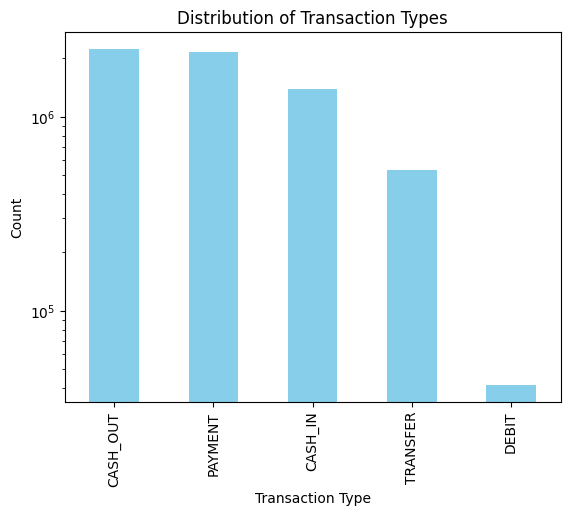

In [17]:
fraud['type'].value_counts().plot(kind='bar',color='skyblue',logy=True)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

In [18]:
print(fraud[(fraud['type']=='PAYMENT') & (fraud['nameDest'].str.startswith('M'))].size)
print(fraud[fraud['type']=='PAYMENT'].size)
print(fraud[fraud['nameDest'].str.startswith('M')].size)


23666445
23666445
23666445


This shows that, where the payment type transaction occurs, there is no fraud

In [19]:
fraud[(fraud['type']=='CASH_OUT')&(fraud['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [20]:
fraud[(fraud['type']=='CASH_IN')&(fraud['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [21]:
fraud[(fraud['type']=='PAYMENT')&(fraud['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [22]:
fraud[(fraud['type']=='DEBIT')&(fraud['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


no fraud when CASH_IN and PAYMENT

In [23]:
fraud[(fraud['type']=='TRANSFER')&(fraud['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


In [24]:
fraud[(fraud['isFraud']==1)&(fraud['isFlaggedFraud']==0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


adding the difference_in_balance_orig, expected_balance_orig and difference_in_balance_Dest, expected_balance_Dest in fraud column

In [25]:
fraud['expected_balance_Orig'] = abs(fraud['oldbalanceOrg'] - fraud['amount'])
fraud['difference_in_balance_Orig'] = abs(fraud['expected_balance_Orig'] - fraud['newbalanceOrig'])

fraud['expected_balance_Dest'] = abs(fraud['oldbalanceDest'] + fraud['amount'])
fraud['difference_in_balance_Dest'] = abs(fraud['expected_balance_Dest'] - fraud['newbalanceDest'])

Text(0.5, 1.0, 'isFlaggedFraud Distribution')

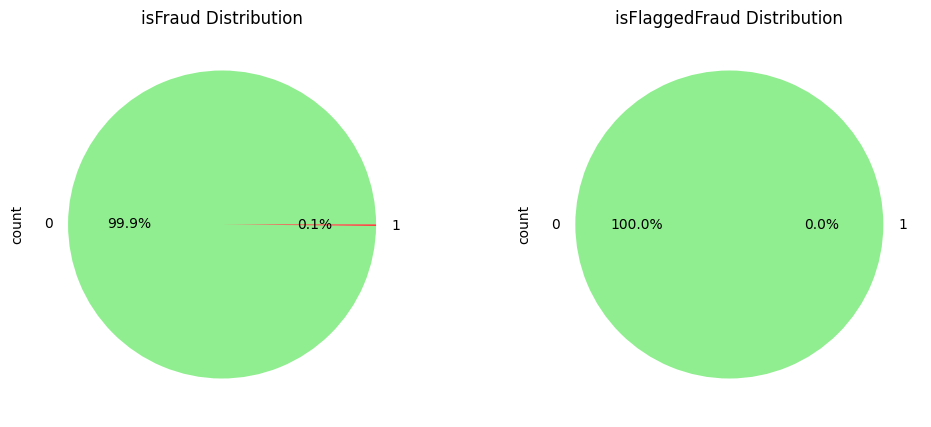

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fraud['isFraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0], colors=['lightgreen', 'red'])
fraud['isFlaggedFraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1], colors=['lightgreen', 'red'])
axes[0].set_title('isFraud Distribution')
axes[1].set_title('isFlaggedFraud Distribution')

* Fraud only in Transfer/Cashout
* There is blind spot, isFlaggedFraud which only catches transaction above 200k which misses the small frauds, results in many fraudslips making the feature to denote isFraud = 0
* The hidden red flag in the dataset is the balance mismatch, some transactions which are normal follows the pattern
'newbalanceOrig = oldbalanceOrg - amount'
<br> but at some transaction newbalanceOrig = 0 (i.e. forced to 0), amount>oldbalanceOrg, which is impossible, it's mislabeled fraud, hence this shows that fraudster overrides the system #also in destination

* With the use of blindspot and hidden red flag we able to understand that the fraudsters were targetting low balance accounts to avoid being flagged and focusing on transactions of type 'TRANSFER' and 'CASHOUT'.

##### Potential modification and solution in the dataset are:
1. Relabeling the mislabeled frauds, transactions type : Cashout/Transfer, oldbalanceorig>amount and newbalanceOrig = 0
2. Adding the feature to detect the anomaly i.e. expected_balance_orig/dest and difference_in_balance_orig/dest

# Relabeling the column with conditions

In [27]:
TOLERANCE = 0.1

# Origin Fraud: Applies only to TRANSFER/CASH-OUT
origin_fraud_condition = (
    (fraud['type'].isin(['TRANSFER', 'CASH_OUT'])) &
    (fraud['difference_in_balance_Orig'] > TOLERANCE)
)

# Destination Fraud: Only for non-merchant TRANSFER/CASH_OUT where recipient balance is wrong
dest_fraud_condition = (
    (~fraud['nameDest'].str.startswith('M', na=False)) &
    (fraud['type'].isin(['TRANSFER', 'CASH_OUT'])) &
    (fraud['difference_in_balance_Dest'] > TOLERANCE)
)

# Combine conditions
fraud_condition = origin_fraud_condition | dest_fraud_condition

In [28]:
fraud.loc[fraud_condition, 'isFraud'] = 1

In [29]:
print(f"Fraud count increased by {(fraud['isFraud'].sum() - data['isFraud'].sum()):,}")

Fraud count increased by 2,513,588


Text(0.5, 1.0, 'After Relabeling')

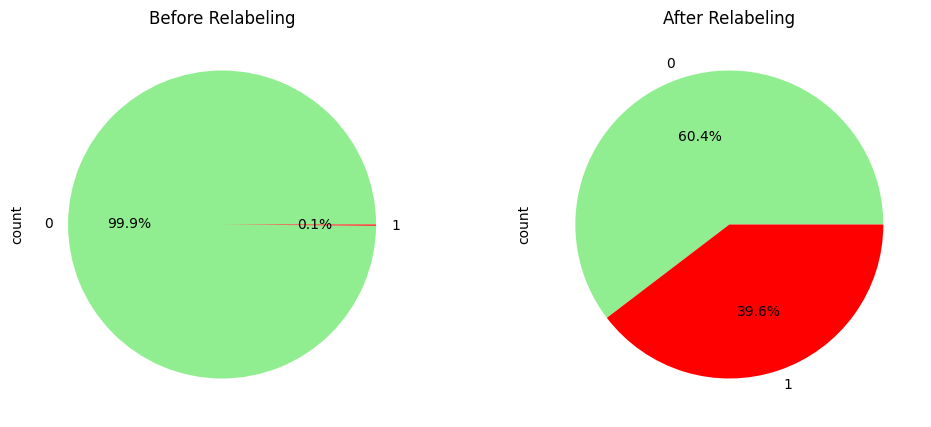

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.title('isFraud Distribution')
data['isFraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0], colors=['lightgreen', 'red'])
fraud['isFraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1], colors=['lightgreen', 'red'])
axes[0].set_title('Before Relabeling')
axes[1].set_title('After Relabeling')

In [31]:
new_frauds = fraud[fraud['isFraud'] > data['isFraud']]

# Sample review
new_frauds.sample(5)[[
    'type', 'amount',
    'oldbalanceOrg', 'newbalanceOrig', 'difference_in_balance_Orig',
    'oldbalanceDest', 'newbalanceDest', 'difference_in_balance_Dest'
]]

,type,amount,oldbalanceOrg,newbalanceOrig,difference_in_balance_Orig,oldbalanceDest,newbalanceDest,difference_in_balance_Dest
5302294,CASH_OUT,208932.85,0.0,0.0,208932.85,902030.10,1110962.95,0.00
5072664,CASH_OUT,373909.13,0.0,0.0,373909.13,849906.61,1223815.73,0.01
2640255,TRANSFER,575125.25,343302.0,0.0,231823.25,215331.55,790456.80,0.00
4433519,CASH_OUT,124391.62,30884.0,0.0,93507.62,0.00,124391.62,0.00
6137926,TRANSFER,1216172.74,9971.0,0.0,1206201.74,0.00,1216172.74,0.00


In [32]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import GradientBoostingClassifier
## Features: Include your difference metrics
#X = fraud[['amount', 'difference_in_balance_Orig', 'difference_in_balance_Dest']]
#y = fraud['isFraud']
#
#model = RandomForestClassifier().fit(X, y)
#Ada = AdaBoostClassifier().fit(X, y)
#Grad = GradientBoostingClassifier().fit(X, y)
#print("Feature importances:", dict(zip(X.columns, model.feature_importances_)))
#print("Feature importances:", dict(zip(X.columns, Ada.feature_importances_)))
#print("Feature importances:", dict(zip(X.columns, Grad.feature_importances_)))

'''The above program was executed in the other environment, due to computational limitations'''

#Output :
print('\n',
'''Feature importances: {'amount': np.float64(0.17188117241773662), 'difference_in_balance_Orig': np.float64(0.266630018618415), 'difference_in_balance_Dest': np.float64(0.5614888089638485)}''',
'\n',

'''Feature importances: {'amount': np.float64(0.2989778989242555 'difference_in_balance_Orig': np.float64(0.36080495967213805), 'difference_in_balance_Dest': np.float64(0.34021714140360665)}''',
'\n',

'''Feature importances: {'amount': np.float64(0.03617856090493463), 'difference_in_balance_Orig': np.float64(0.18973610042576367), 'difference_in_balance_Dest': np.float64(0.7740853386693017)}''')


 Feature importances: {'amount': np.float64(0.17188117241773662), 'difference_in_balance_Orig': np.float64(0.266630018618415), 'difference_in_balance_Dest': np.float64(0.5614888089638485)} 
 Feature importances: {'amount': np.float64(0.2989778989242555 'difference_in_balance_Orig': np.float64(0.36080495967213805), 'difference_in_balance_Dest': np.float64(0.34021714140360665)} 
 Feature importances: {'amount': np.float64(0.03617856090493463), 'difference_in_balance_Orig': np.float64(0.18973610042576367), 'difference_in_balance_Dest': np.float64(0.7740853386693017)}


✅ Relabeling was highly successful—the model now prioritizes the exact patterns which were identified.

# Feature Engineering and Label Encoding

In [33]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   step                        int64  
 1   type                        object 
 2   amount                      float64
 3   nameOrig                    object 
 4   oldbalanceOrg               float64
 5   newbalanceOrig              float64
 6   nameDest                    object 
 7   oldbalanceDest              float64
 8   newbalanceDest              float64
 9   isFraud                     int64  
 10  isFlaggedFraud              int64  
 11  expected_balance_Orig       float64
 12  difference_in_balance_Orig  float64
 13  expected_balance_Dest       float64
 14  difference_in_balance_Dest  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 728.1+ MB


In [34]:
fraud.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'expected_balance_Orig', 'difference_in_balance_Orig',
       'expected_balance_Dest', 'difference_in_balance_Dest'],
      dtype='object')

In [35]:
fraud['Dest_is_merchant'] = fraud['nameDest'].str.startswith('M').astype(int)

In [36]:
fraud[['Dest_is_merchant','isFraud']].corr()

,Dest_is_merchant,isFraud
Dest_is_merchant,1.000000,-0.579181
isFraud,-0.579181,1.000000


In [37]:
fraud['nameOrig'].str.startswith('M').astype(int).value_counts()

,count
nameOrig,
0,6362620


In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
label = LabelEncoder()
fraud['type_encoded'] = label.fit_transform(fraud['type'])

In [40]:
d = fraud[['type_encoded','type']].set_index('type_encoded').to_dict()['type']
d

{3: 'PAYMENT', 4: 'TRANSFER', 1: 'CASH_OUT', 2: 'DEBIT', 0: 'CASH_IN'}

In [41]:
pd.DataFrame(d,index=[0]).T

,0
3,PAYMENT
4,TRANSFER
1,CASH_OUT
2,DEBIT
0,CASH_IN


In [42]:
fraud[['type_encoded','isFraud']].corr()

,type_encoded,isFraud
type_encoded,1.000000,-0.061856
isFraud,-0.061856,1.000000


another approach would be as to introduce two new features, i.e. is_high_risk(we have seen so far, that the TRANSFER and CASH_OUT transactions are the one where the fraud occurs) and is_payment(fraud does not occurs), which will be binary to check whether transaction is payment or at high risk

In [43]:
fraud['is_high_risk'] = fraud['type'].isin(['TRANSFER', 'CASH_OUT']).astype(int)
fraud['is_payment'] = fraud['type'].isin(['PAYMENT']).astype(int)

In [44]:
fraud[['is_high_risk','is_payment','type_encoded','isFraud']].corr()

,is_high_risk,is_payment,type_encoded,isFraud
is_high_risk,1.000000,-0.627714,-0.089163,0.922683
is_payment,-0.627714,1.000000,0.680754,-0.579181
type_encoded,-0.089163,0.680754,1.000000,-0.061856
isFraud,0.922683,-0.579181,-0.061856,1.000000


It worked!, therefore selecting this two newly introduced features and dropping the type and type_encoded feature in next section

# Feature Selection

In [45]:
fraud.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'expected_balance_Orig', 'difference_in_balance_Orig',
       'expected_balance_Dest', 'difference_in_balance_Dest',
       'Dest_is_merchant', 'type_encoded', 'is_high_risk', 'is_payment'],
      dtype='object')

<Axes: >

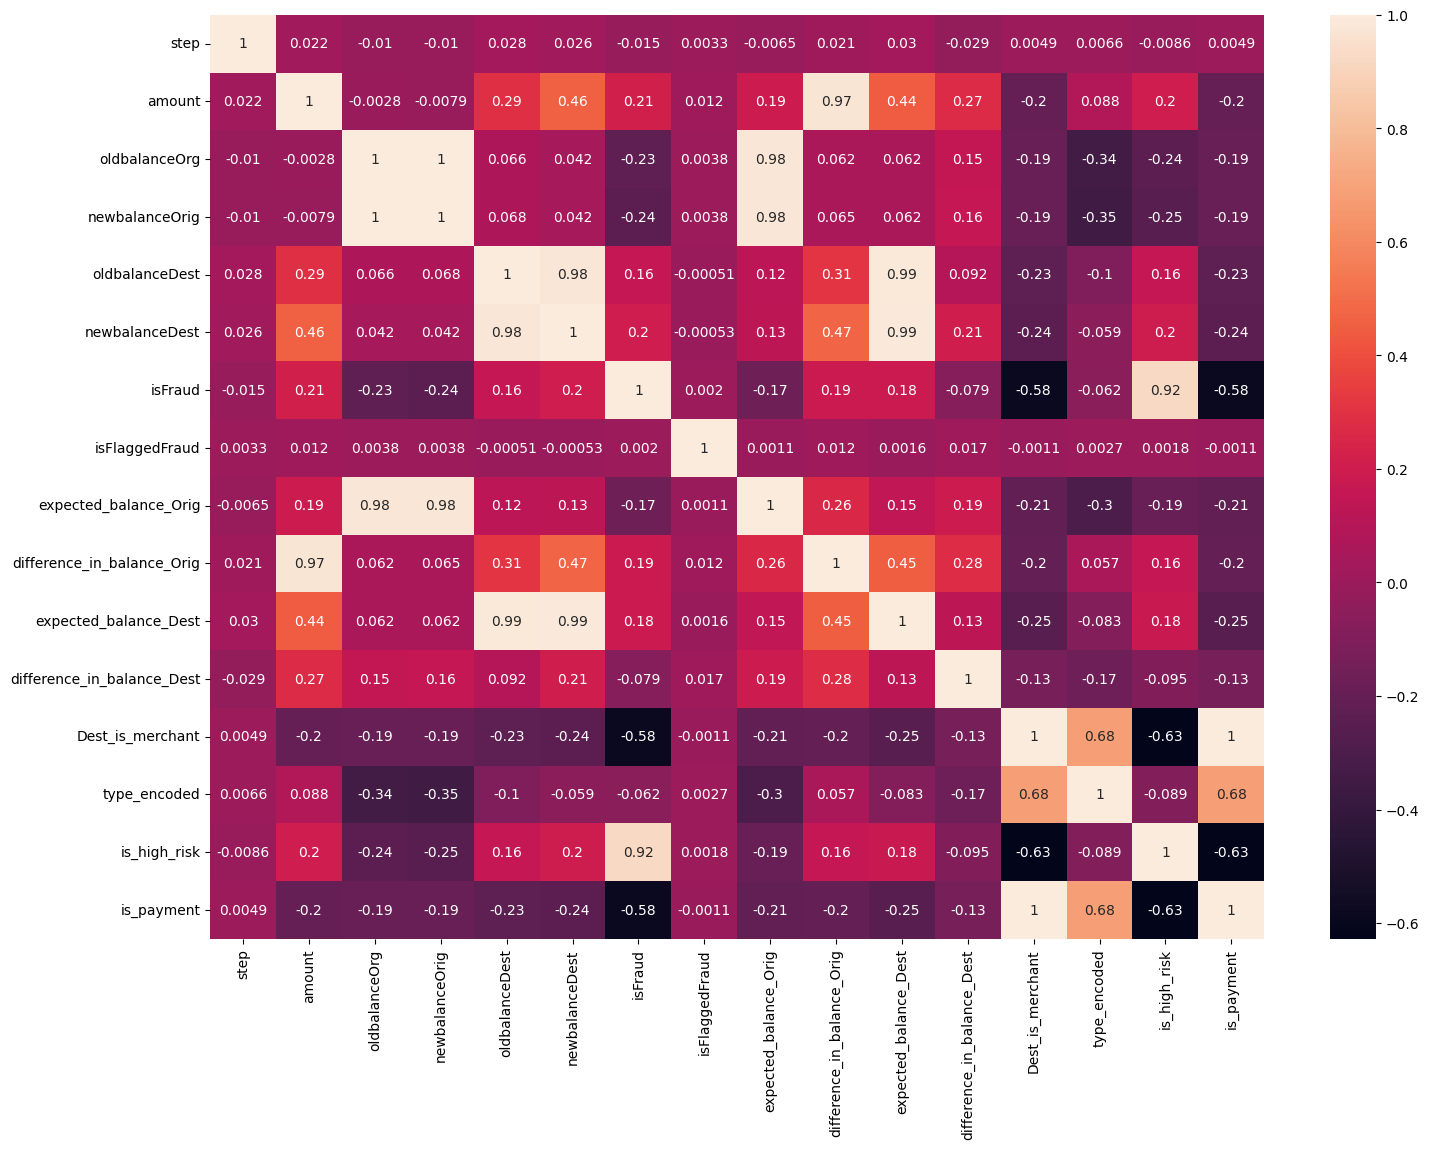

In [46]:
plt.figure(figsize=(17,12))
sns.heatmap(fraud.corr(numeric_only=True),annot=True)

* isFlaggedFraud is useless in this dataset (might be useful if thresold could be less)
<br>
* Collinearity :
    * 'newbalanceOrig' <--> 'oldbalanceOrg'
    * 'oldbalanceDest' <--> 'newbalanceDest'
    * 'expected_balance_Orig' <--> 'newbalanceOrig' and 'oldbalanceOrg'
    * 'expected_balance_Dest' <--> 'oldbalanceDest' and 'newbalanceDest'<br>

As the 'expected_balance_Orig' and 'expected_balance_Dest' created the redundancy in dataset, can be safely removed as we have the difference_in_balance_* column
<br>
* The 'type' feature is object datatype, so we introdued the three new features in the dataset,
    * 'type_encoded' : encoded version of type
    * 'is_high_risk' : TRANSFER and CASHOUT transaction type
    * 'is_payment' : PAYMENT transactions which are safe

So now there is no need of type and type_encoded as well
<br>

* There is complete correlation between the 'Dest_is_merchant' and 'is_payment' and similar correlation with 'isFraud', any one can be selected from two,so selecting the 'Dest_is_merchant' feature for training the model

* According to my assumption, we don't need the 'nameOrigin' and 'nameDest' column as they are object and with help of feature engineering we already introduced the feature 'Dest_is_merchant'

* Final feature selection table with reasoning
<br>

| Column                      | Keep? | Action | Reasoning |
|-----------------------------|-------|--------|-----------|
| `step`                      | ❌    | Drop   | Near-zero correlation (-0.015) with fraud |
| `type`                      | ❌    | Drop   | Replaced by better flags |
| `amount`                    | ✅    | Keep   | Core feature |
| `nameOrig`                  | ❌    | Drop   | No Need |
| `oldbalanceOrg`             | ❌    | Drop   | Keep `newbalanceOrig` + differences |
| `newbalanceOrig`            | ✅    | Keep   | Critical post-transaction state |
| `nameDest`                  | ❌    | Drop   | Already have `Dest_is_merchant` |
| `oldbalanceDest`            | ❌    | Drop   | Keep `newbalanceDest` + differences |
| `newbalanceDest`            | ✅    | Keep   | Critical post-transaction state |
| `isFraud`                   | ✅    | Keep   | Target variable |
| `isFlaggedFraud`            | ❌    | Drop   | Useless (0.17% flag rate) |
| `expected_balance_*`        | ❌    | Drop   | Fully redundant with differences |
| `difference_in_balance_*`   | ✅    | Keep   | Primary fraud signals |
| `Dest_is_merchant`          | ✅    | Keep   | Better than `is_payment` |
| `type_encoded`              | ❌    | Drop   | Replaced by binary flags |
| `is_high_risk`              | ✅    | Keep   | TRANSFER/CASH_OUT = 92% of fraud |
| `is_payment`                | ❌    | Drop   | Covered by `Dest_is_merchant` |

In [47]:
final_features = [
    'amount',
    'newbalanceOrig',
    'newbalanceDest',
    'difference_in_balance_Orig',
    'difference_in_balance_Dest',
    'Dest_is_merchant',
    'is_high_risk'  # TRANSFER/CASH_OUT
]
#'isFraud' # TARGET variable

# Normalization, standardization and log transformation on the dataset's features

In [48]:
fraud[final_features].describe()

,amount,newbalanceOrig,newbalanceDest,difference_in_balance_Orig,difference_in_balance_Dest,Dest_is_merchant,is_high_risk
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.551137e+05,1.224996e+06,1.766049e+05,9.359907e+04,3.381461e-01,4.354195e-01
std,6.038582e+05,2.924049e+06,3.674129e+06,6.012996e+05,4.350570e+05,4.730786e-01,4.958119e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,1.960000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,0.000000e+00,2.146614e+05,4.571200e+04,5.123620e+03,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.442584e+05,1.111909e+06,2.053685e+05,4.342133e+04,1.000000e+00,1.000000e+00
max,9.244552e+07,4.958504e+07,3.561793e+08,9.244552e+07,7.588573e+07,1.000000e+00,1.000000e+00


* Amount is right skewed, need log transformation
* newbalanceOrig/Dest need robust scaling as 25% of values are 0
* difference_in_balance_Orig/Dest also need robust scaling

## Log Transformation

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64


,amount
count,6.362620e+06
mean,1.084087e+01
std,1.814509e+00
min,0.000000e+00
25%,9.502306e+00
50%,1.122355e+01
75%,1.224876e+01
max,1.834213e+01


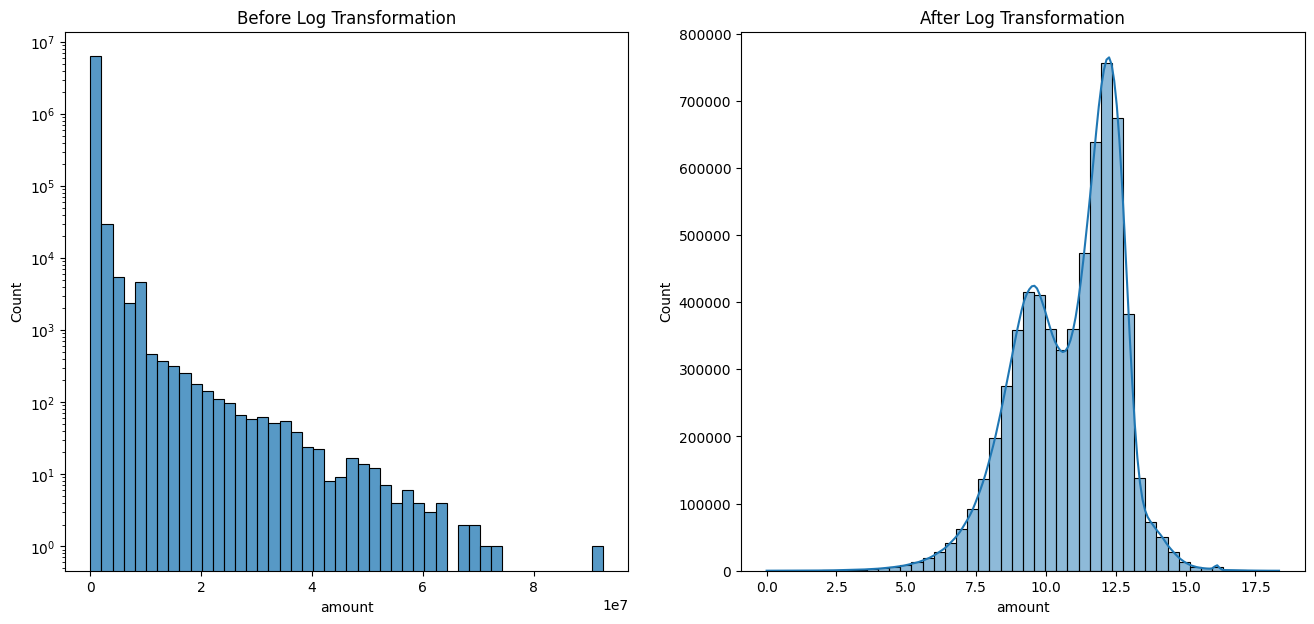

In [49]:
print(fraud['amount'].describe())
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=[16,7])
plt.title('Amount Data Distribution on histogram')
sns.histplot(fraud['amount'],bins=46,log=True,ax=axes[0])
axes[0].set_title('Before Log Transformation')
sns.histplot(np.log1p(fraud['amount']),bins=46,ax=axes[1],kde=True) #as some amount are zero
axes[1].set_title('After Log Transformation')
np.log1p(fraud['amount']).describe()

In [50]:
fraud['amount_log'] = np.log1p(fraud['amount'])

## Robust Scaling

In [51]:
scaling_features = ['newbalanceOrig', 'newbalanceDest', 'difference_in_balance_Orig', 'difference_in_balance_Dest']
fraud[scaling_features].describe()

,newbalanceOrig,newbalanceDest,difference_in_balance_Orig,difference_in_balance_Dest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,8.551137e+05,1.224996e+06,1.766049e+05,9.359907e+04
std,2.924049e+06,3.674129e+06,6.012996e+05,4.350570e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.960000e+03,0.000000e+00
50%,0.000000e+00,2.146614e+05,4.571200e+04,5.123620e+03
75%,1.442584e+05,1.111909e+06,2.053685e+05,4.342133e+04
max,4.958504e+07,3.561793e+08,9.244552e+07,7.588573e+07


In [52]:
scaled_features = ['newbalanceOrig_scaled', 'newbalanceDest_scaled', 'difference_in_balance_Orig_scaled', 'difference_in_balance_Dest_scaled']

In [53]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler(quantile_range=(10,90)) #needs wider range
fraud[scaled_features] = robust.fit_transform(fraud[scaling_features])

In [54]:
fraud[scaled_features].describe()

,newbalanceOrig_scaled,newbalanceDest_scaled,difference_in_balance_Orig_scaled,difference_in_balance_Dest_scaled
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,4.339919e-01,3.162367e-01,3.135930e-01,2.791297e-01
std,1.484029e+00,1.150009e+00,1.440592e+00,1.372554e+00
min,0.000000e+00,-6.718942e-02,-1.095167e-01,-1.616442e-02
25%,0.000000e+00,-6.718942e-02,-1.048210e-01,-1.616442e-02
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.321481e-02,2.808402e-01,3.825047e-01,1.208248e-01
max,2.516567e+01,1.114176e+02,2.213713e+02,2.393944e+02


Hence the mean ~= 0, std ~=1, max needs to handle, this will be done with help of stop clipping by making the range (-5,+5), this will make the model to not get affected by outlier values

### Soft clipping

In [55]:
clipped_data = np.clip(fraud[scaled_features], -5, 5)

In [56]:
clipped_data = pd.DataFrame(clipped_data)
clipped_data.describe()

,newbalanceOrig_scaled,newbalanceDest_scaled,difference_in_balance_Orig_scaled,difference_in_balance_Dest_scaled
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,3.583055e-01,2.870141e-01,2.707158e-01,2.541721e-01
std,1.042631e+00,7.396522e-01,6.773014e-01,6.051146e-01
min,0.000000e+00,-6.718942e-02,-1.095167e-01,-1.616442e-02
25%,0.000000e+00,-6.718942e-02,-1.048210e-01,-1.616442e-02
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.321481e-02,2.808402e-01,3.825047e-01,1.208248e-01
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


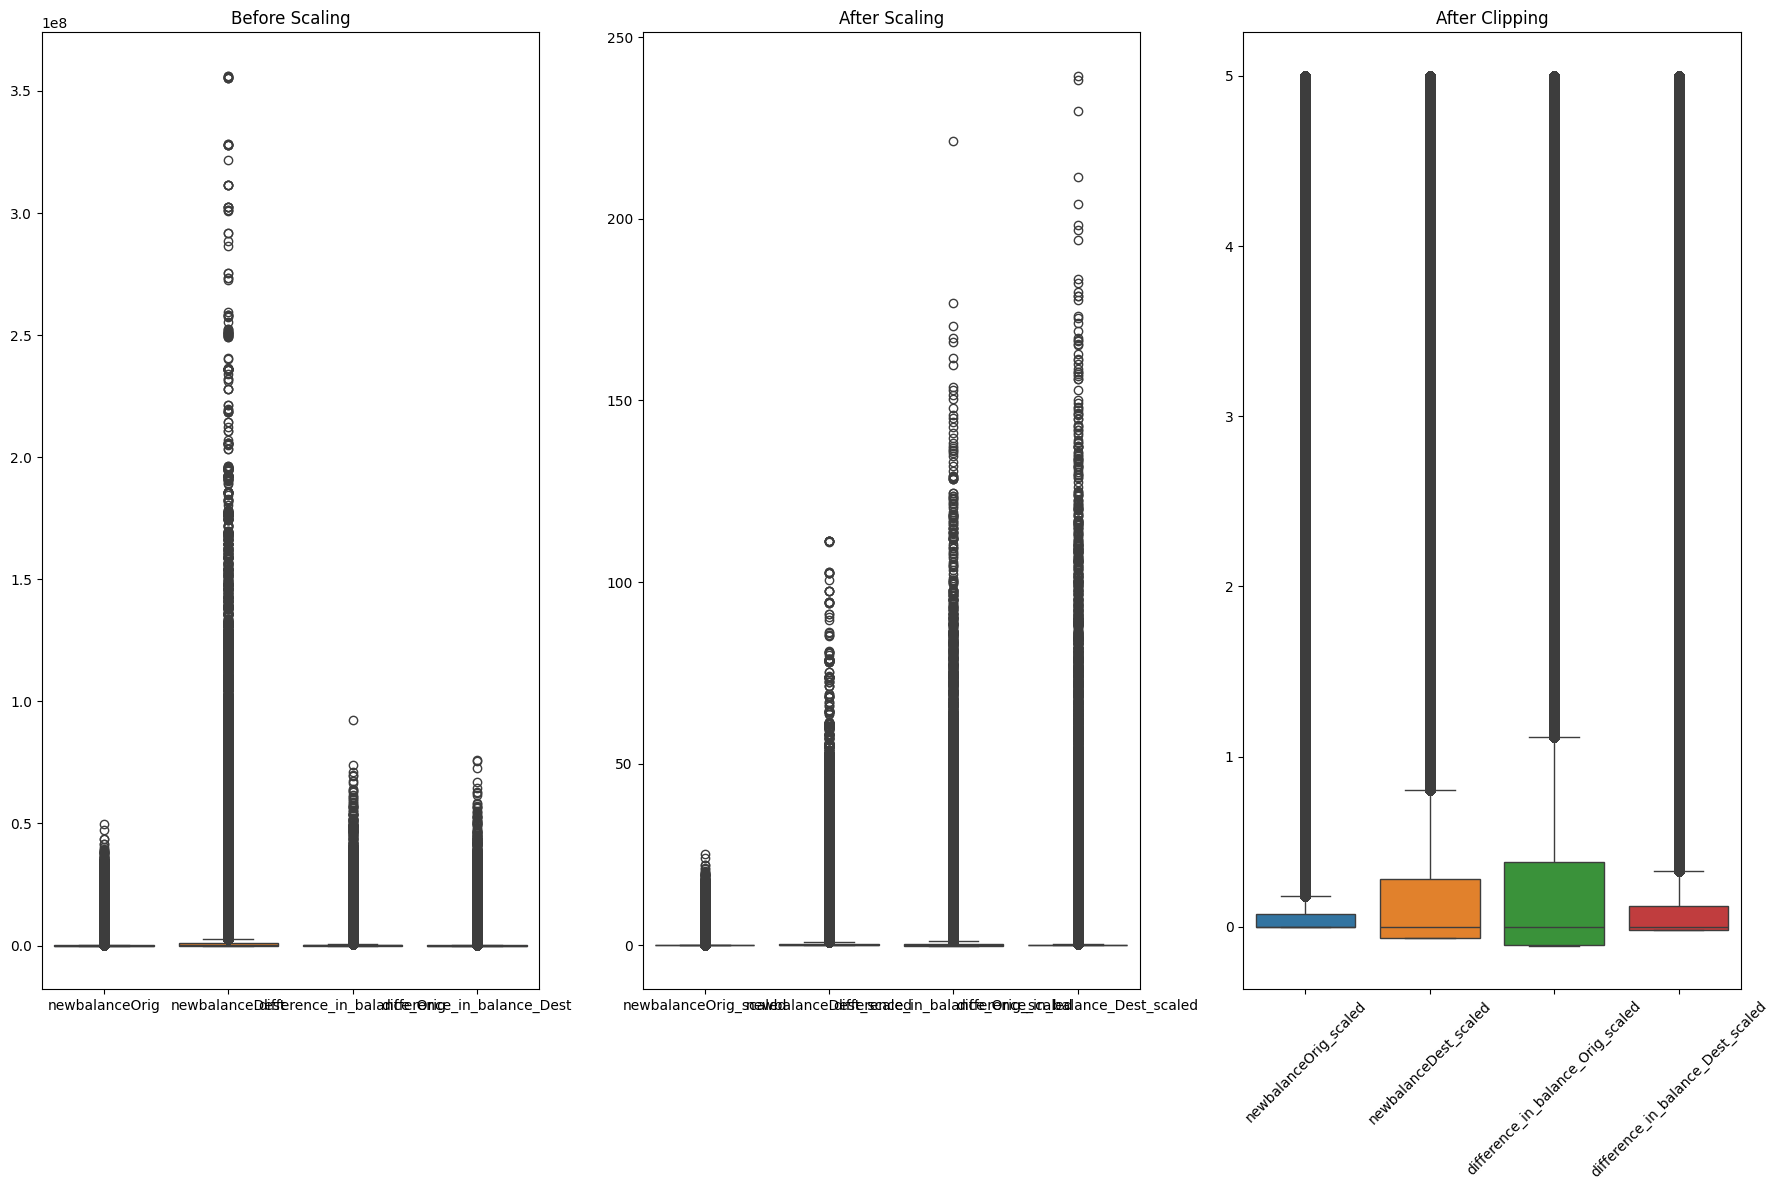

In [57]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=[18,12])
plt.title('Scaling')
sns.boxplot(data=fraud[scaling_features],ax=axes[0])
axes[0].set_title('Before Scaling')
plt.xticks(rotation=45)
sns.boxplot(data=fraud[scaled_features],ax=axes[1])
axes[1].set_title('After Scaling')
plt.xticks(rotation=45)
sns.boxplot(data=clipped_data,ax=axes[2])
axes[2].set_title('After Clipping')
plt.xticks(rotation=45)
plt.tight_layout()

# Final Data Readiness Checklist

In [58]:
model_data = fraud[['amount_log','Dest_is_merchant','is_high_risk']]
model_data = model_data.merge(clipped_data,left_index=True,right_index=True)

In [59]:
model_data = model_data.merge(fraud['isFraud'],left_index=True,right_index=True)

In [60]:
model_data.describe()

,amount_log,Dest_is_merchant,is_high_risk,newbalanceOrig_scaled,newbalanceDest_scaled,difference_in_balance_Orig_scaled,difference_in_balance_Dest_scaled,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.084087e+01,3.381461e-01,4.354195e-01,3.583055e-01,2.870141e-01,2.707158e-01,2.541721e-01,3.963463e-01
std,1.814509e+00,4.730786e-01,4.958119e-01,1.042631e+00,7.396522e-01,6.773014e-01,6.051146e-01,4.891380e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.718942e-02,-1.095167e-01,-1.616442e-02,0.000000e+00
25%,9.502306e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.718942e-02,-1.048210e-01,-1.616442e-02,0.000000e+00
50%,1.122355e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.224876e+01,1.000000e+00,1.000000e+00,7.321481e-02,2.808402e-01,3.825047e-01,1.208248e-01,1.000000e+00
max,1.834213e+01,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.000000e+00


<Axes: >

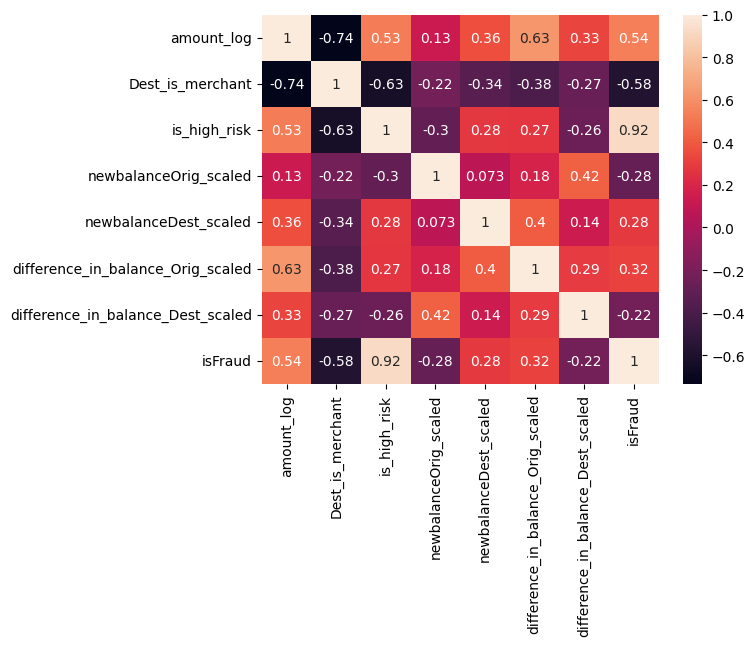

In [61]:
sns.heatmap(model_data.corr(numeric_only=True),annot=True)

Text(0.5, 1.0, 'Before Labeling')

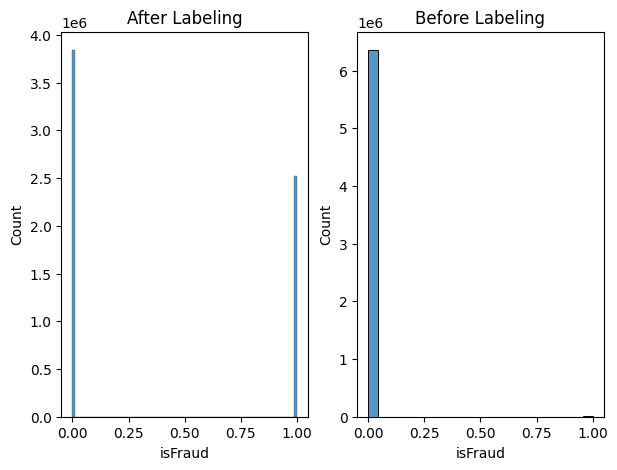

In [62]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=[7,5])
plt.title('isFraud Data Distribution on histogram')
sns.histplot(model_data['isFraud'],ax=axes[0])
axes[0].set_title('After Labeling')
sns.histplot(data['isFraud'],ax=axes[1])
axes[1].set_title('Before Labeling')

Everything is perfect!

In [63]:
model_data_relabeled = model_data
model_data_labeled = model_data.drop(columns=['isFraud'])
model_data_labeled['isFraud'] = data['isFraud']

<Axes: >

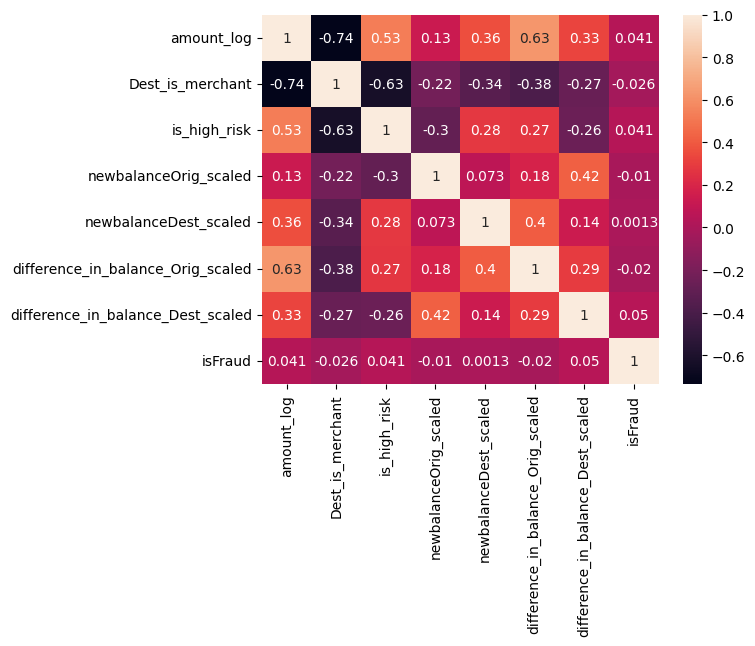

In [64]:
sns.heatmap(model_data_labeled.corr(numeric_only=True),annot=True)

# Training models both on labeled and relabeled dataset

Models choosed for the dataset are:
1. Logistic Regression
2. Random Forest
3. LightGBM


#### The Class (not using because it was consuming lots of time for training)

In [65]:
%%capture
!pip install lightgbm
!pip install xgboost
!pip install tensorflow

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
# from xgboost import XGBClassifier
import lightgbm as lgb

# from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.layers import Input, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, roc_auc_score



class model:
    def __init__(self,X_train,X_test,y_train,y_test) -> None:

        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

        self.lr = LogisticRegression(class_weight='balanced')
        self.rf = RandomForestClassifier(class_weight='balanced_subsample')
        self.svm = OneClassSVM(nu=0.01) #Unsupervised method, will only give y==0, for training

        scale_pos_weight = len(self.y_train[self.y_train==0]) / len(self.y_train[self.y_train==1])
        #self.xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, tree_method='hist')
        self.lgbm = lgb.LGBMClassifier(is_unbalance=True)

        # input_dim = self.X_train.shape[1]
        # self.autoen = Sequential([
        #     Dense(16, activation='relu', input_shape=(input_dim,)),
        #     Dropout(0.1),
        #     Dense(8, activation='relu'),
        #     Dense(16, activation='relu'),
        #     Dense(input_dim, activation='linear')
        # ])
        # self.autoen.compile(optimizer=Adam(0.001), loss='mse')

    def train(self):
        self.lr.fit(self.X_train,self.y_train)
        self.rf.fit(self.X_train,self.y_train)
        self.svm.fit(self.X_train[self.y_train==0]) #unsupervised
        # self.xgb.fit(self.X_train,self.y_train)
        self.lgbm.fit(self.X_train,self.y_train)

        normal_idx = np.where(self.y_train == 0)[0]
        # history = model.fit(
        #     self.X_train[normal_idx],
        #     self.X_train[normal_idx],
        #     epochs=20,
        #     batch_size=1024,
        #     validation_split=0.1,
        #     callbacks=[EarlyStopping(patience=3)],
        #     verbose=2
        # )

    def evaluate(self):
        results = {}
        self.supervised_models = [('Logistic Regression', self.lr),
                          ('Random Forest', self.rf),
                          # ('XGBoost', self.xgb),
                          ('LightGBM', self.lgbm)]


        # Supervised models evaluation
        for name, model in self.supervised_models:
            y_pred = model.predict(self.X_test)
            y_score = model.predict_proba(self.X_test)[:, 1]
            results[name] = {
                'classification_report': classification_report(self.y_test, y_pred),
                'roc_auc': roc_auc_score(self.y_test, y_score)
            }

        # One-Class SVM evaluation
        svm_pred = np.where(self.svm.predict(self.X_test) == 1, 0, 1)
        svm_scores = -self.svm.score_samples(self.X_test)
        results['One-Class SVM'] = {
            'classification_report': classification_report(self.y_test, svm_pred),
            'roc_auc': roc_auc_score(self.y_test, svm_scores)
        }

        # Autoencoder evaluation
        # reconstructions = self.autoencoder.predict(self.X_test_scaled)

        # mse = np.mean(np.power(self.X_test - reconstructions, 2), axis=1)

        # ae_pred = (mse > np.quantile(mse, 0.99)).astype(int)  # Top 1% as fraud
        # results['Autoencoder'] = {
        #     'classification_report': classification_report(self.y_test, ae_pred),
        #     'roc_auc': roc_auc_score(self.y_test, mse)
        # }
        return results

    def predict_fraud(self, X_new):
        predictions = {}

        # Supervised models
        for name, model in self.supervised_models:
            predictions[name] = model.predict(X_new)

        # One-Class SVM
        predictions['One-Class SVM'] = np.where(self.svm.predict(X_new) == 1, 0, 1)

        # # Autoencoder
        # reconstructions = self.autoencoder.predict(X_new)
        # mse = np.mean(np.power(X_new - reconstructions, 2), axis=1)
        # predictions['Autoencoder'] = (mse > np.quantile(mse, 0.99)).astype(int)

        return predictions

In [67]:
#labeled_model = model(X_train_labeled,X_test_labeled,y_train_labeled,y_test_labeled)
#relabeled_model = model(X_train_relabeled,X_test_relabeled,y_train_relabeled,y_test_relabeled)

### Train Test Split

In [68]:
from sklearn.model_selection import train_test_split

X_train_labeled, X_test_labeled, y_train_labeled, y_test_labeled = train_test_split(model_data_labeled.drop(columns=['isFraud']), model_data_labeled['isFraud'], test_size=0.2, random_state=42)

X_train_relabeled, X_test_relabeled, y_train_relabeled, y_test_relabeled = train_test_split(model_data_relabeled.drop(columns=['isFraud']), model_data_relabeled['isFraud'], test_size=0.2  , random_state=42)

### For relabeled data

In [69]:
Lr_relabeled = LogisticRegression(class_weight='balanced')
rf_relabeled = RandomForestClassifier(class_weight='balanced_subsample')
svm_relabeled = OneClassSVM(nu=0.01) #Unsupervised method, will only give y==0, for train
lgbm_relabeled = lgb.LGBMClassifier(is_unbalance=True)

In [70]:
Lr_relabeled.fit(X_train_relabeled,y_train_relabeled)

LogisticRegression(class_weight='balanced')

In [71]:
rf_relabeled.fit(X_train_relabeled,y_train_relabeled)

RandomForestClassifier(class_weight='balanced_subsample')

In [72]:
#svm_relabeled.fit(X_train_relabeled[y_train_relabeled==0])

In [73]:
lgbm_relabeled.fit(X_train_relabeled,y_train_relabeled)

[LightGBM] [Info] Number of positive: 2017835, number of negative: 3072261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.396424 -> initscore=-0.420389
[LightGBM] [Info] Start training from score -0.420389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier(is_unbalance=True)

In [74]:
lr_y_pred_relabeled = Lr_relabeled.predict(X_test_relabeled)

<Axes: >

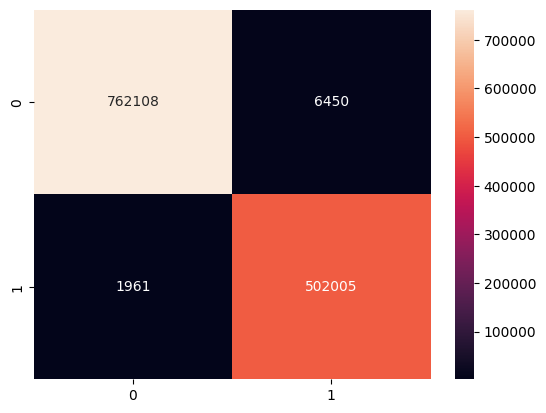

In [75]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test_relabeled,lr_y_pred_relabeled),annot=True,fmt='d')

<Axes: >

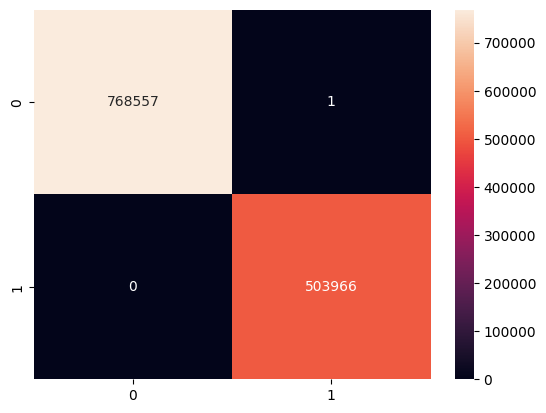

In [76]:
rf_y_pred_relabeled = rf_relabeled.predict(X_test_relabeled)
sns.heatmap(confusion_matrix(y_test_relabeled,rf_y_pred_relabeled),annot=True,fmt='d')

<Axes: >

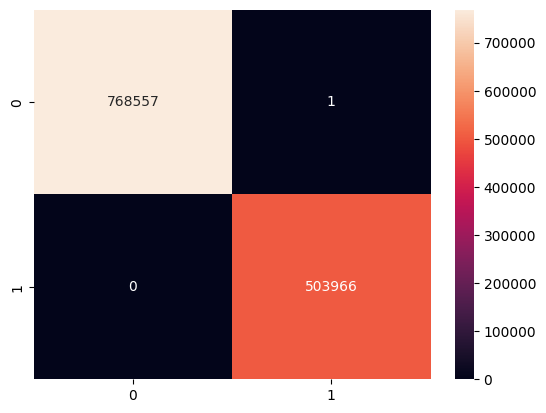

In [77]:
lgbm_y_pred_relabeled = lgbm_relabeled.predict(X_test_relabeled)
sns.heatmap(confusion_matrix(y_test_relabeled,lgbm_y_pred_relabeled),annot=True,fmt='d')

### For labeled data

In [78]:
Lr_labeled = LogisticRegression(class_weight='balanced')
rf_labeled = RandomForestClassifier(class_weight='balanced_subsample')
svm_labeled = OneClassSVM(nu=0.01) #Unsupervised method, will only give y==0, for train
lgbm_labeled = lgb.LGBMClassifier(is_unbalance=True)

In [79]:
Lr_labeled.fit(X_train_labeled,y_train_labeled)

LogisticRegression(class_weight='balanced')

In [80]:
rf_labeled.fit(X_train_labeled,y_train_labeled)

RandomForestClassifier(class_weight='balanced_subsample')

In [81]:
#svm_labeled.fit(X_train_labeled[y_train_labeled==0])

In [82]:
lgbm_labeled.fit(X_train_labeled,y_train_labeled)

[LightGBM] [Info] Number of positive: 6593, number of negative: 5083503
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001295 -> initscore=-6.647747
[LightGBM] [Info] Start training from score -6.647747


LGBMClassifier(is_unbalance=True)

<Axes: >

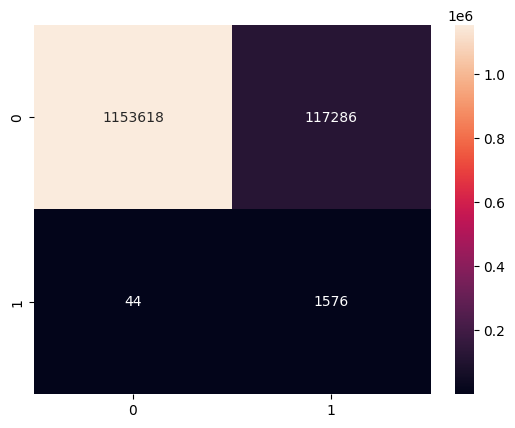

In [83]:
lr_y_pred_labeled = Lr_labeled.predict(X_test_labeled)
sns.heatmap(confusion_matrix(y_test_labeled,lr_y_pred_labeled),annot=True,fmt='d')

<Axes: >

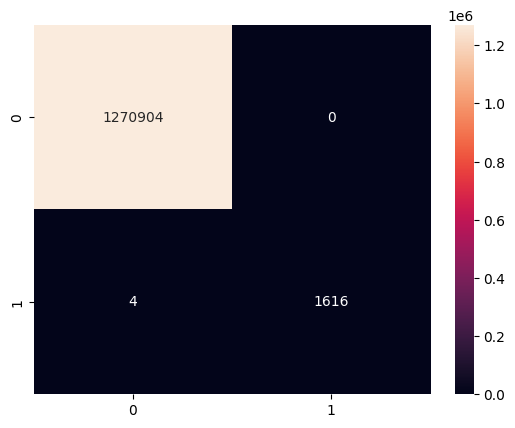

In [84]:
rf_y_pred_labeled = rf_labeled.predict(X_test_labeled)
sns.heatmap(confusion_matrix(y_test_labeled,rf_y_pred_labeled),annot=True,fmt='d')

In [ ]:
lgbm_y_pred_labeled = lgbm_labeled.predict(X_test_labeled)
sns.heatmap(confusion_matrix(y_test_labeled,lgbm_y_pred_labeled),annot=True,fmt='d')

# Final Decision

The random forest outperforms the other models in both the labeled as well as relabeled data

In [86]:
print('Classification report of Random Forest on Labeled Dataset:\n')
print(classification_report(y_test_labeled,rf_y_pred_labeled))

Classification report of Random Forest on Labeled Dataset:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       1.00      1.00      1.00      1620

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524



In [87]:
print('Classification report of Random Forest on Relabeled Dataset:\n')
print(classification_report(y_test_relabeled,rf_y_pred_relabeled))

Classification report of Random Forest on Relabeled Dataset:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    768558
           1       1.00      1.00      1.00    503966

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524



In [88]:
from sklearn.metrics import roc_curve, auc

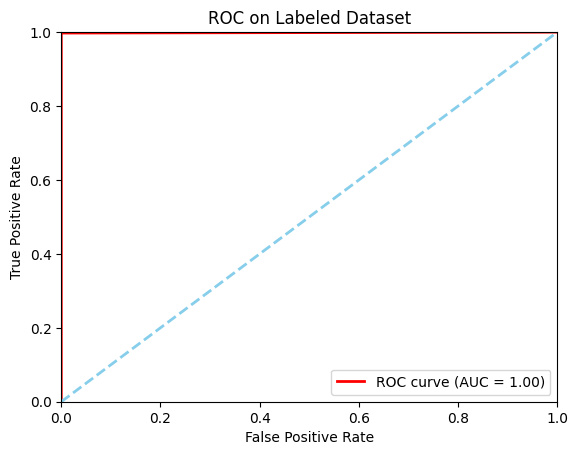

In [89]:
fpr, tpr, thresholds = roc_curve(y_test_labeled,rf_y_pred_labeled)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')  # Add a diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Labeled Dataset')
plt.legend(loc="lower right")
plt.show()

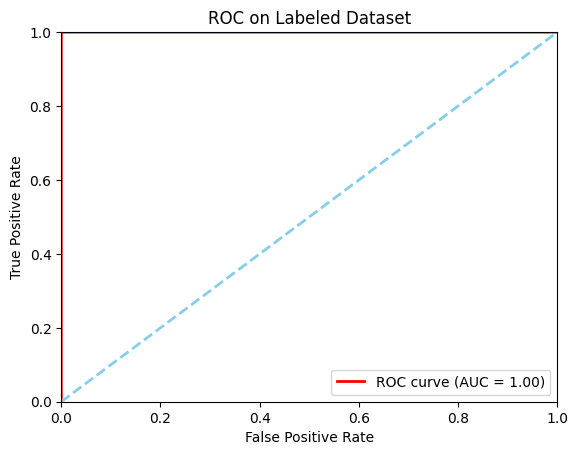

In [90]:
fpr, tpr, thresholds = roc_curve(y_test_relabeled,rf_y_pred_relabeled)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')  # Add a diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Labeled Dataset')
plt.legend(loc="lower right")
plt.show()

#### Verdict

Random Forest is the machine learning algorithm which will be used for the fraud detection as it shows the  highest performance among all.

Note : The accuracy achieved was near to 100%, there might be two possibility ,
1. machine has learned all the patterns correctly
2. The model gets overfitted

To confirm the model will need the new data to test accurately

##### Miscellanous (unused)

In [91]:
models = [
    'Random Forest',
    'Logistic Regression',
    # 'XGBoost',
    'LightGBM',
    'One-Class SVM',
    # 'Autoencoder'
]

def confusion_matrix_plot(ytrue,ypred):

    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle('Confusion Matrices for All Models (Validation Set)', fontsize=16)
    for i, model_name in enumerate(models):

        cm = confusion_matrix(ytrue, ypred[model_name])

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Fraud'],
                yticklabels=['Normal', 'Fraud'],
                ax=axs[i])

        axs[i].set_title(model_name)
        axs[i].set_xlabel('Predicted')
        axs[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [92]:
#confusion_matrix_plot(y_val_labeled,predict_1)

NameError: name 'y_val_labeled' is not defined

In [ ]:
#confusion_matrix_plot(y_val_relabeled,predict_2)